<h1> Capstone Project - The Battle of the Neighborhoods: Best Place to Stay in Washington, DC for Free Activities <h1>
<h3>13 November 2020<h3>

<h3> Introduction

<h7> Problem Description and Goal:
    
This project will attempt to identify which Washington, DC neighborhoods provide the greatest value to Airbnb customers while remaining in close proximity to free attractions, such as parks, monuments, museums, etc.
    
    The actual target location will be the National Mall, which is home to several free attractions, including the Smithsonian museums, Presidential monuments (e.g., George Washington National Monument, Lincoln Monument, etc.), war memorials (e.g., Vietnam, WWII, WWI, Korea), Capitol Building Complex, National Archives, Library of Congress, and much more.
    
    Because of foot traffic, this area can be expensive for merchants and parking is almost non-existent. Great area to be in for a business, but either too expensive or first-come-first served.

   <h7> Target Audience:
       
This project may be of interest to local businesses, including would-be restraunteurs and food trucks, street performers, merchandisers. In addition, this project aims to illuminate, for potential tourists, where to stay in DC to maximize bang for your buck without compromising proximity to free attractions.
       
        


<h3> Data

<h7> Data Description: 
This project will make use of free, publicly-available datasets. This data will be made available on my Github/Coursera_Capstone Sources include:
    1.	FourSquare’s City Guide data on Washington, DC sightseeing attractions
    2.	Inside Airbnb’s listing dataset for Washington, DC (compiled on 9 September 2020);
        •	Prior to cleaning, this data includes 74 attributes and 7,350 tuples
        •	Inside Airbnb uses the following parameters for this dataset:
            1.	A high availability filter and frequently rented filter use criterion of 60 nights/year to identify listings not available for residential housing.
            2.	A review rate of 50% for the number of guests making a booking who leave a review
            3.	An average booking of 3 nights unless a higher minimum nights is configured for a listing
            4.	A maximum occupancy rate of 70% to ensure the occupancy model does not produce artifically high results based on the available data
    3.	Open Data DC Points of Interest dataset (compiled on 22 October 2020)
        •	Prior to cleaning, this data includes 35 attributes and 9,339 tuples

This data will be used to discern the best value for Airbnb stays in DC by neighborhood, where value is informed by:
    •	The average cost for a two-night stay or longer per neighborhood
    •	The proximity of each neighborhood to the city’s 10 most popular, free tourist attractions as ranked by FourSquare users
    
Additional information such as data type, data previews, etc. will be gleaned during exploratory data analysis.


<h5> Step 1 - Import libraries <h5>      

In [2]:
import pandas as pd
import numpy as np
import random # library for random number generation
import locale
import requests
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import json
from math import sin, cos, sqrt, atan2, radians
from sklearn.cluster import KMeans
import matplotlib.path as mpltPath

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

<h5> Step 2 - Install Folium for map visualizations <h5>

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.3.0               |     pyhd3deb0d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb

<h5> Step 3 - Install GeoPy <h5>

In [5]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

<h5> Step 4 - Download and read AirBNB Washington, DC listing data <h5>

In [6]:
listings_df= pd.read_csv('http://data.insideairbnb.com/united-states/dc/washington-dc/2020-10-24/data/listings.csv.gz')

<h5> Step 5 Download and read AirBNB Washington, DC neighborhood data <h5>

In [7]:
nbh_df= pd.read_csv('http://data.insideairbnb.com/united-states/dc/washington-dc/2020-10-24/visualisations/neighbourhoods.csv')

<h5> Perform exploratory data analysis <h5>

In [8]:
# Get shape, column names, and data typesfor each listings data set
print(listings_df.shape)
print(listings_df.columns)
print(listings_df.dtypes)

(7482, 74)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'c

In [9]:
# Now, let's get a preview of the listings dataframe
listings_df.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20201024055559,2020-10-24,Vita's Hideaway,"IMPORTANT NOTES<br />* Carefully read and be sure that you understand the cancellation policy outlined for this listing. Call airbnb for clarification BEFORE you make a reservation. You can lose money for alterations to and cancellation of a reservation. I WILL NOT refund money beyond what the cancellation policy says is due to the guest.<br /><br />* Carefully read my profile, description and reviews. The reviews by numerous outsiders are honest perspectives about us as hosts and the neighborhood.<br /><br /><b>The space</b><br />IMPORTANT NOTES<br /><br />* Airbnb keeps accurate track of our dates of availability so please use the airbnb site to see if the dates that you are interested in are available. <br /><br />* You'll have access to even more specific details once your reservation is confirmed because you will then have access to our house manual. <br /><br />* From our reviews and recommendations, which we strongly suggest you read to get an outsider's perspective, it is","We love that our neighborhood is up and coming. New restaurants, art galleries, a playhouse, and renovated homes are popping up right before our eyes.",https://a0.muscache.com/pictures/61e02c7e-3d66-466a-b740-8f3e29494f88.jpg,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United States","I am a literary scholar, teacher, poet, vegan chef, and, most important, mother of two beautiful, athletic, and artistic children, who is looking to host good-hearted, adventurous, and open-minded people visiting our nation's capital! Although I have lived in the D.C. metropolitan area for over 15 years, I hail from Memphis, Tennessee and am very much a southerner who believes in making people feel comfortable and at home. I take pride in having hosted travelers from Boston, Iowa, California, South Carolina, Australia, the UK, Germany, India, Thailand, South Korea, China, Taiwan, and even more far away places. I value and am fascinated by the personal and cultural uniqueness of each of my guests. Because I am a foodie who loves exploring cultures through food, the question I most want to ask each of them is what is your favorite food and why? Whether they stay 2 nights or 30 nights, the vast majority of our guests have left feeling a deeper connection to the city and to us as a result of their stay with us.",within a day,75%,100%,f,https://a0.muscache.com/im/users/4645/profile_pic/1353648671/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/4645/profile_pic/1353648671/original.jpg?aki_policy=profile_x_medium,Anacostia,

In [10]:
# Get shape, column names, and data types for each neighborhood data set
print(nbh_df.shape)
print(nbh_df.columns)
print(nbh_df.dtypes)

(39, 2)
Index(['neighbourhood_group', 'neighbourhood'], dtype='object')
neighbourhood_group    float64
neighbourhood           object
dtype: object


In [11]:
# Now it's the neighborhoods dataframe's turn
nbh_df.head(5)

,neighbourhood_group,neighbourhood
0,NaN,"Brightwood Park, Crestwood, Petworth"
1,NaN,"Brookland, Brentwood, Langdon"
2,NaN,"Capitol Hill, Lincoln Park"
3,NaN,"Capitol View, Marshall Heights, Benning Heights"
4,NaN,"Cathedral Heights, McLean Gardens, Glover Park"


<h3> Methodology

<h7> As is evident from the code above, some initial exploratory data analysis was performed to get a better idea of structure of the data, its data types, the informaiton contained in the data set, and what information is redundant.
    
    From reviewing the dataframes we could tell that Neighborhoods data set is not needed. The listings data set includes five columns related to neighborhood. This should be sufficient for analysis and eliminate the need to merge to two later. We can also tell that the 'neighbourhoods_cleansed' attribute is better for our purposes than 'host_neighborhood'. This judgement is based on the fact that 'neighbourhoods_cleansed' is a sanitization of the neighborhood data, whereas host_neighborhood is raw input by the host. This results in people listing their building as a neighorhood or their conception of what "their neighborhood" is rather than boundaries recognized by the City. 
    
    Machine learning won't be necessary for this project as we are not projecting any information that doesn't already exist. If we were considering, as an investor, where should you buy property to get the best investment? That would be appropriate. Here, the goal is to figure out where you might want to stay in DC, on a budget, to take advantage of free attractions. Like most cities, DC has taxis, uber drivers, metro rail (subway), etc., so getting around isn't difficult. However, from my limited experience, cities are often best explored by foot, not tour buses.
    
    This is the purpose of this project. DC is one of the most expensive places in the United States. Where can you stay that's affordable and be able to walk to things that are free. Eating will still be expensive, so why not save your money elsewhere. Plus, it's the questions people will ask upon learning of your visit. If you visit Paris, the questions are what did you think of the Louvre, the Eiffel Tower, Monmatre, Notre Dame, they don't ask or, frankly care, about obscure things with which they can't identify themselves. Reductive social analysis, but true.
    

<h5> Step 6 - Draw some initial thoughts and conclusions about the way forward <h5>

<h7> We can see from the two dataframes, that listings is comprehensive enough to negate the need to include a separate neighborhoods dataframe. Specifically, there are at least five columns related to neighborhood, so inclusion of a separate dataframe to merge later is unnecessary.
    
   <h7> Secondly, there are too many unneeded columns in the listing dataframe. It make the data harder to read, calculations slower, and generally are superfluous for what information we're trying to gain from this exercise.
       <h7> Let's clean the data, first by removing columns that we need, then filtering it by some of the criteria described earlier (e.g., at least two-day stays or longer, ratings > 85%, etc.), and sorting by the property types.

<h5> Step 7 - Clean the listings dataframe

In [12]:
subset_df = listings_df[['id','listing_url','name','picture_url','host_neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','price','minimum_minimum_nights','review_scores_rating' ]]
subset_df.head()

,id,listing_url,name,picture_url,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,price,minimum_minimum_nights,review_scores_rating
0,3686,https://www.airbnb.com/rooms/3686,Vita's Hideaway,https://a0.muscache.com/pictures/61e02c7e-3d66-466a-b740-8f3e29494f88.jpg,Anacostia,Historic Anacostia,38.86177,-76.98966,Private room in house,$55.00,2,92.0
1,3943,https://www.airbnb.com/rooms/3943,Historic Rowhouse Near Monuments,https://a0.muscache.com/pictures/432713/fab7ddd4_original.jpg,Eckington,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91066,-77.00438,Private room in townhouse,$80.00,27,96.0
2,4197,https://www.airbnb.com/rooms/4197,Bedroom in DC 2 blocks to Metro,https://a0.muscache.com/pictures/5e2bd169-b14f-421e-a36e-bcdbca899bdc.jpg,Capitol Hill,"Capitol Hill, Lincoln Park",38.88791,-76.99668,Private room in house,$75.00,28,97.0
3,4529,https://www.airbnb.com/rooms/4529,Bertina's House Part One,https://a0.muscache.com/pictures/86072003/670918e2_original.jpg,Eastland Gardens,"Eastland Gardens, Kenilworth",38.90645,-76.94305,Private room in house,$54.00,30,93.0
4,4967,https://www.airbnb.com/rooms/4967,"DC, Near Metro",https://a0.muscache.com/pictures/2439810/bb320e68_original.jpg,Ivy City,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91409,-76.99368,Private room in house,$99.00,2,95.0


In [13]:
# Filter Accomodations for stays two nights or more
filtered_df = subset_df[(subset_df.minimum_minimum_nights >= 2)].copy()
filtered_df.shape

(5448, 12)

In [15]:
# Convert price from object to int
filtered_df['price'].fillna('$0', inplace=True)
filtered_df.fillna('0', inplace=True)
filtered_df['price'] = filtered_df['price'].replace('[\$,]', '', regex=True).astype(float)

filtered_df.head(10)

,id,listing_url,name,picture_url,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,price,minimum_minimum_nights,review_scores_rating
0,3686,https://www.airbnb.com/rooms/3686,Vita's Hideaway,https://a0.muscache.com/pictures/61e02c7e-3d66-466a-b740-8f3e29494f88.jpg,Anacostia,Historic Anacostia,38.86177,-76.98966,Private room in house,55.0,2,92
1,3943,https://www.airbnb.com/rooms/3943,Historic Rowhouse Near Monuments,https://a0.muscache.com/pictures/432713/fab7ddd4_original.jpg,Eckington,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91066,-77.00438,Private room in townhouse,80.0,27,96
2,4197,https://www.airbnb.com/rooms/4197,Bedroom in DC 2 blocks to Metro,https://a0.muscache.com/pictures/5e2bd169-b14f-421e-a36e-bcdbca899bdc.jpg,Capitol Hill,"Capitol Hill, Lincoln Park",38.88791,-76.99668,Private room in house,75.0,28,97
3,4529,https://www.airbnb.com/rooms/4529,Bertina's House Part One,https://a0.muscache.com/pictures/86072003/670918e2_original.jpg,Eastland Gardens,"Eastland Gardens, Kenilworth",38.90645,-76.94305,Private room in house,54.0,30,93
4,4967,https://www.airbnb.com/rooms/4967,"DC, Near Metro",https://a0.muscache.com/pictures/2439810/bb320e68_original.jpg,Ivy City,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91409,-76.99368,Private room in house,99.0,2,95
5,5589,https://www.airbnb.com/rooms/5589,Cozy apt in Adams Morgan,https://a0.muscache.com/pictures/207249/9f1df8fd_original.jpg,Adams Morgan,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91933,-77.04124,Entire apartment,63.0,14,91
6,7103,https://www.airbnb.com/rooms/7103,"Best of Washington - Great neighborhood, parking",https://a0.muscache.com/pictures/ad9eb007-05e9-439c-94fc-09af51dead43.jpg,Berkley,"Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir",38.91988,-77.09796,Entire guest suite,99.0,3,97
7,9097,https://www.airbnb.com/rooms/9097,Adams Morgan Charm,https://a0.muscache.com/pictures/216789/4dbeaab6_original.jpg,Adams Morgan,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91966,-77.04306,Private room in apartment,42.0,2,97
8,9641,https://www.airbnb.com/rooms/9641,Sophisticated Logan Circle Loft,https://a0.muscache.com/pictures/a33bb2a4-49ef-4ec5-98d1-dcf8a3b69166.jpg,Logan Circle,"Dupont Circle, Connecticut Avenue/K Street",38.91146,-77.03636,Entire loft,185.0,2,95
11,13744,https://www.airbnb.com/rooms/13744,"Heart of the City -HalfBlock to METRO, Restaurants",https://a0.muscache.com/pictures/90537/6d641fa4_original.jpg,Columbia Heights,"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",38.92836,-77.03136,Entire apartment,100.0,30,98


<h5> Step 8 - Get a better sense of how many properties exist per neighborhood and the average price per neighborhood.

<h7> Better. Now let's get idea of the average price per neighborhood. First, we need to convert price from an object to a integer.

In [16]:
nbh_price = filtered_df.groupby('neighbourhood_cleansed')['price'].mean()
nbh_price

neighbourhood_cleansed
Brightwood Park, Crestwood, Petworth                                                                 147.630573
Brookland, Brentwood, Langdon                                                                        103.063158
Capitol Hill, Lincoln Park                                                                           229.668593
Capitol View, Marshall Heights, Benning Heights                                                       87.936170
Cathedral Heights, McLean Gardens, Glover Park                                                       256.258621
Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace             227.535211
Colonial Village, Shepherd Park, North Portal Estates                                                148.500000
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           141.909627
Congress Heights, Bellevue, Washington Highlands                                 

In [17]:
# Tired of typing long handles
f_df = filtered_df

In [18]:
counts= f_df.\
    groupby(['neighbourhood_cleansed'])['id'].\
    count()

print(counts)

neighbourhood_cleansed
Brightwood Park, Crestwood, Petworth                                                                 314
Brookland, Brentwood, Langdon                                                                         95
Capitol Hill, Lincoln Park                                                                           519
Capitol View, Marshall Heights, Benning Heights                                                       47
Cathedral Heights, McLean Gardens, Glover Park                                                        58
Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace              71
Colonial Village, Shepherd Park, North Portal Estates                                                 20
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           509
Congress Heights, Bellevue, Washington Highlands                                                      55
Deanwood, Burrville, Grant Park,

<h7> Now that we have to totals of properties per neighborhood, let's visualize it to make it easier to take understand.

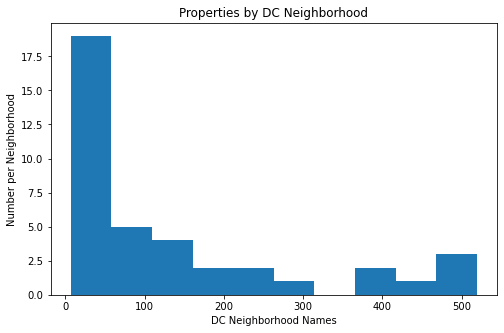

In [23]:
counts.plot(kind='hist', figsize=(8, 5))

plt.title('Properties by DC Neighborhood') # add a title to the histogram
plt.ylabel('Number per Neighborhood') # add y-label
plt.xlabel('DC Neighborhood Names') # add x-label

plt.show()

In [69]:
# Now let's sort the dataframe by neighborhood and property type
s_df = f_df.sort_values(['neighbourhood_cleansed','property_type','price'])
s_df.head(10)

,id,listing_url,name,picture_url,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,price,minimum_minimum_nights,review_scores_rating
7360,45864959,https://www.airbnb.com/rooms/45864959,IN-HOUSE APARTMENT IN A QUIET STREET IN THE DC.,https://a0.muscache.com/pictures/7cb2ff36-a967-447c-8a48-7dea5962f90d.jpg,Northwest Washington,"Brightwood Park, Crestwood, Petworth",38.93761,-77.02132,Entire apartment,36.0,7,0
3402,21567411,https://www.airbnb.com/rooms/21567411,Charming NW D.C. English Basement,https://a0.muscache.com/pictures/93119f3c-197d-4e83-8c0b-598da59109f2.jpg,Crestwood,"Brightwood Park, Crestwood, Petworth",38.94400,-77.03899,Entire apartment,40.0,3,0
4483,29339165,https://www.airbnb.com/rooms/29339165,"Cute studio at Petworth, DC",https://a0.muscache.com/pictures/d887bbfc-08ff-4fb0-b932-2abed0493829.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.93758,-77.02384,Entire apartment,45.0,2,0
4927,32864938,https://www.airbnb.com/rooms/32864938,Stylish Petworth Pied-à-Terre w/ private parking,https://a0.muscache.com/pictures/3ec23171-2cca-446c-95d6-cb6f7d74c1e0.jpg,0,"Brightwood Park, Crestwood, Petworth",38.94961,-77.01794,Entire apartment,46.0,4,82
5780,38773382,https://www.airbnb.com/rooms/38773382,Bright Large & Comfy 1 Bedroom Flat / 2nd Floor,https://a0.muscache.com/pictures/fc8b5769-b244-485b-ac54-0128f321b187.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.95518,-77.02324,Entire apartment,48.0,10,100
3027,19625495,https://www.airbnb.com/rooms/19625495,Renovated Basement 1BR Apt Private Entrance,https://a0.muscache.com/pictures/56a4b232-2753-484a-9251-b900a8075bad.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.95582,-77.01613,Entire apartment,51.0,5,93
4801,31877863,https://www.airbnb.com/rooms/31877863,Moderne Chic Basement Apartment-Private Parking,https://a0.muscache.com/pictures/fe67b3de-b126-4ffa-aa6b-65b52be095d3.jpg,0,"Brightwood Park, Crestwood, Petworth",38.95070,-77.01687,Entire apartment,51.0,4,73
1487,14899604,https://www.airbnb.com/rooms/14899604,DC Living! Newly Renovated Apartment in Petworth,https://a0.muscache.com/pictures/5f56c7c5-ffad-49a2-87b1-bd9757b50a59.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.93985,-77.01722,Entire apartment,52.0,30,93
228,1962063,https://www.airbnb.com/rooms/1962063,1 bedroom in 2 bedroom apartment,https://a0.muscache.com/pictures/27080849/83e5270f_original.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.94097,-77.02242,Entire apartment,53.0,21,0
3857,24084817,https://www.airbnb.com/rooms/24084817,GEM IN THE HEART OF PETWORTH ** ALL ESSENTIALS PROVIDED,https://a0.muscache.com/pictures/d5eb1107-b55f-4e2e-8607-cdbe85074e4d.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.94740,-77.02455,Entire apartment,56.0,2,97


In [52]:
# Lets get an idea of what DC looks like. I chose the Stamen Toner map to clearly delineate boundries. Toward the bottom of the map, there's a rectangle with a grey circle. This is the National Mall area with most of DC's free attractions, including most of the Smithsonian museums, monuments to U.S. Presidents, memorials for past wars, Library of Congress, National Archives, and the Captiol Building Complex.
dc_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12.5, tiles='Stamen Toner')

# display map
dc_map

<h5> Let's group our dataframe by neighborhood and pull the 10 according to price.

In [70]:
grouped = s_df.groupby(['neighbourhood_cleansed'])
grouped.head(10)

# Funny, looking at the data, someone is listing their property $800/night and has zero reviews. I wonder how many people have actually rented it.

,id,listing_url,name,picture_url,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,price,minimum_minimum_nights,review_scores_rating
7360,45864959,https://www.airbnb.com/rooms/45864959,IN-HOUSE APARTMENT IN A QUIET STREET IN THE DC.,https://a0.muscache.com/pictures/7cb2ff36-a967-447c-8a48-7dea5962f90d.jpg,Northwest Washington,"Brightwood Park, Crestwood, Petworth",38.93761,-77.02132,Entire apartment,36.0,7,0
3402,21567411,https://www.airbnb.com/rooms/21567411,Charming NW D.C. English Basement,https://a0.muscache.com/pictures/93119f3c-197d-4e83-8c0b-598da59109f2.jpg,Crestwood,"Brightwood Park, Crestwood, Petworth",38.94400,-77.03899,Entire apartment,40.0,3,0
4483,29339165,https://www.airbnb.com/rooms/29339165,"Cute studio at Petworth, DC",https://a0.muscache.com/pictures/d887bbfc-08ff-4fb0-b932-2abed0493829.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.93758,-77.02384,Entire apartment,45.0,2,0
4927,32864938,https://www.airbnb.com/rooms/32864938,Stylish Petworth Pied-à-Terre w/ private parking,https://a0.muscache.com/pictures/3ec23171-2cca-446c-95d6-cb6f7d74c1e0.jpg,0,"Brightwood Park, Crestwood, Petworth",38.94961,-77.01794,Entire apartment,46.0,4,82
5780,38773382,https://www.airbnb.com/rooms/38773382,Bright Large & Comfy 1 Bedroom Flat / 2nd Floor,https://a0.muscache.com/pictures/fc8b5769-b244-485b-ac54-0128f321b187.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.95518,-77.02324,Entire apartment,48.0,10,100
3027,19625495,https://www.airbnb.com/rooms/19625495,Renovated Basement 1BR Apt Private Entrance,https://a0.muscache.com/pictures/56a4b232-2753-484a-9251-b900a8075bad.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.95582,-77.01613,Entire apartment,51.0,5,93
4801,31877863,https://www.airbnb.com/rooms/31877863,Moderne Chic Basement Apartment-Private Parking,https://a0.muscache.com/pictures/fe67b3de-b126-4ffa-aa6b-65b52be095d3.jpg,0,"Brightwood Park, Crestwood, Petworth",38.95070,-77.01687,Entire apartment,51.0,4,73
1487,14899604,https://www.airbnb.com/rooms/14899604,DC Living! Newly Renovated Apartment in Petworth,https://a0.muscache.com/pictures/5f56c7c5-ffad-49a2-87b1-bd9757b50a59.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.93985,-77.01722,Entire apartment,52.0,30,93
228,1962063,https://www.airbnb.com/rooms/1962063,1 bedroom in 2 bedroom apartment,https://a0.muscache.com/pictures/27080849/83e5270f_original.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.94097,-77.02242,Entire apartment,53.0,21,0
3857,24084817,https://www.airbnb.com/rooms/24084817,GEM IN THE HEART OF PETWORTH ** ALL ESSENTIALS PROVIDED,https://a0.muscache.com/pictures/d5eb1107-b55f-4e2e-8607-cdbe85074e4d.jpg,Petworth,"Brightwood Park, Crestwood, Petworth",38.94740,-77.02455,Entire apartment,56.0,2,97


<h5> Step 10 - Let's get our FourSquare data.

In [74]:
CLIENT_ID = 'C1AI2TUNZAJFKMTTISNLVFRD2E322DBARJ2GLZ1OARUJIM1G' # Foursquare ID
CLIENT_SECRET = 'ELBREFGENGIEA2FERHG2RYJT2DJDOMZSCU12AB44DXCNIHSI' # Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C1AI2TUNZAJFKMTTISNLVFRD2E322DBARJ2GLZ1OARUJIM1G
CLIENT_SECRET:ELBREFGENGIEA2FERHG2RYJT2DJDOMZSCU12AB44DXCNIHSI


In [75]:
# This is the address for the Smithsonian Castle, the former Headquarters of the Smithsonian Institute. It's in the center of the mall, so attractions are one direction or the other. Either way, that's the best general target as it brings you to where all the action is.
address = '1000 Jefferson Dr SW, Washington, DC 20560'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

38.888761599999995 -77.02594135


In [77]:
search_query = 'Top Picks'
radius = 500
print(search_query + ' .... Wawaweewah!')

Top Picks .... Wawaweewah!


In [90]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

#https://foursquare.com/explore?mode=url&near=Washington%20Mall%2C%20Washington%2C%20D.C.%2C%20United%20States&nearGeoId=3188&q=Top%20Picks

'https://api.foursquare.com/v2/venues/search?client_id=C1AI2TUNZAJFKMTTISNLVFRD2E322DBARJ2GLZ1OARUJIM1G&client_secret=ELBREFGENGIEA2FERHG2RYJT2DJDOMZSCU12AB44DXCNIHSI&ll=38.888761599999995,-77.02594135&v=20180604&query=Top Picks&radius=500&limit=30'

In [93]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fb0799c4450ba020e2d6e58'},
 'response': {'venues': [{'id': '4c377a413849c92865c7bdb1',
    'name': 'Lincolns Top Hat Exhibit',
    'location': {'address': 'Lenfant Plz SW',
     'crossStreet': 'at National Museum of Natural History',
     'lat': 38.890865812342376,
     'lng': -77.0300817489624,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.890865812342376,
       'lng': -77.0300817489624}],
     'distance': 428,
     'postalCode': '20560',
     'cc': 'US',
     'city': 'Washington',
     'state': 'D.C.',
     'country': 'United States',
     'formattedAddress': ['Lenfant Plz SW (at National Museum of Natural History)',
      'Washington, D.C. 20560',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d191941735',
      'name': 'Science Museum',
      'pluralName': 'Science Museums',
      'shortName': 'Science Museum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_science_

<h3> Results

<h7> Looking at the data, we can determine there's really only three neighborhoods worth booking your stay - Capitol Hill, Georgetown, and Penn Quarter.
    
    One is southwest, but along the water. Anothor is part of the northern portion of the mall. The third is just north of the White House and Pennsylvania Avenue. 
    
    Other neighborhoods have a lot going on, but not categorically different from other cities. We're looking for neighborhoods closest to the mall and free activities. SW DC is in contention, but there's nothing outside of housing. If you're looking for restaurant, bar, or shopping options, these three neighborhoods are your best bet.
    
    In Capitol Hill, home to the Capitol Building Complex, National Archives, and Library of Congress, you can stay per night between 50-70...not too bad.
    In Georgetown, you can stay between 60-105 per night, enjoying both the National Mall and the Waterfront. Georgetown itself is an attraction. Dating back to the colonial period, the neighborhood has kept much of its charm. It's also filled with shops, restaurants, and bars. This neighborhood is also right along the DC waterfront.
    Penn Quarter is a relatively up-and-coming neighborhood. Located close to the White House, it isn't the closest to the National Mall. Penn Quarter used to be a sleepy area of the town -- for work and not play. It's still a work in progress, but more and more restaurants are coming each week.